# Assignment 3: ICP + Non-linear least squares optimization
  
  
Team Name: Bhagwaan Bharose  
Team ID: Team 11  
Member Names: Tushar Choudhary (2019111019), Ayush Goyal (2019111026)

## Instructions

* You are not allowed to use any external libraries (other than ones being imported below).
* The deadline for this assignment is **15-09-21** at 11:55pm.
* Plagiarism is **strictly prohibited**

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Non Linear Least Squares Optimization

## 1.1 Gradient Descent
Implement the gradient descent algorithm using numpy and what you have learned from class to solve for the parameters of a gaussian distribution.
To understand the task in more detail and look at a worked through example, checkout the subsequent section. You have to implement the same using just numpy functions. You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.
* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value vs the number of iterations
* The Ground Truth data values and the predicted data values.

Your plots are expected to contain information similar to the plot below:

<!-- <figure> -->
<img src='./helpers/sample_plt.png' alt=drawing width=500 height=600>

<!-- <figcaption align='center'><b>A sample plot, you can use your own plotting template</b></figcaption>
</figure> -->
<!-- head over to [this page](https://saishubodh.notion.site/Non-Linear-Least-Squares-Solved-example-Computing-Jacobian-for-a-Gaussian-Gradient-Descent-7fd11ebfee034f8ca89cc78c8f1d24d9) -->

## Worked out Example using Gradient Descent

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

### Jacobian of Gaussian

$$\mathbf{J}_y=\left[\frac{\partial y}{\partial a} \quad \frac{\partial y}{\partial m} \quad \frac{\partial y}{\partial s}\right] \\
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

## Problem at hand

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

Our observations would generally be erroneous and given to us, but for the sake of knowing how good our model is performing, let us generate the observations ourselves by assuming the actual "actual" parameter values as $a_{gt}=10; m_{gt} =0; s_{gt} =20$ ($gt$ stands for ground truth). We will try to estimate these values based on our observations and let us see how close we get to "actual" parameters. Note that in reality we obviously don't have these parameters as that is exactly what we want to estimate in the first place. So let us consider the following setup, we have:

- Number of observations, $num\_obs = 50$
- Our 50 set of observations would be
    - $x_{obs} = np.linspace(-25,25, num\_obs)$
    - $y_{obs} = y(x_{obs};a_{gt},m_{gt},s_{gt})$  from $(1)$

Reference:

→[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

- Say we are given initial estimate as:

    $$a_0=10; \quad m_0=13; \quad s_0=19.12$$

### Residual and error to be minimized

Okay, now we have set of observations and an initial estimate of parameters. We would now want to minimize an error that would give us optimum parameters.

The $residual$ would be given by

$$ r(a,m,s) = \left[ a \exp \left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$

where we'd want to minimize $\|r\|^2$. Note that $r$ is a non-linear function in $(a,m,s)$.

Also, note that since $y$ (and $x$) are observations in the above equation, after simplification, we get $\mathbf{J}_r = \mathbf{J}_y$ [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0) (since $y_{obs}$ is a constant).

Let us apply Gradient Descent method for minimization here. From [Table I](https://www.notion.so/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02),  

$$\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k})$$

Note that $\mathbf{J_F}$ is the Jacobian of "non-linear least squares" function $\mathbf{F}$ while $\mathbf{J}_r$ is the Jacobian of the residual. 

where $\mathbf{k}$ is $[a,m,s]^T$. 

- Some hyperparameters:
    - Learning rate, $lr = 0.01$
    - Maximum number of iterations, $num\_iter=200$
    - Tolerance, $tol = 1e-15$

## Solution for 1 iteration

To see how each step looks like, let us solve for 1 iteration and for simpler calculations, assume we have 3 observations, 

$$x_{obs}= \left[ -25, 0, 25 \right]^T, y_{obs} = \left[  4.5783, 10, 4.5783 \right]^T. $$

With our initial estimate as $\mathbf{k_0} = [a_0=10, \quad m_0=13, \quad s_0=19.12]^T$, the residual would be 

$$ r(a_0,m_0,s_0) = \left[ a_0 \exp \left(\frac{-(x_{obs}-m_0)^{2}}{2 s_0^{2}}\right) - y_{obs}\ \right]$$

Therefore, $r=[-3.19068466, -2.0637411 , 3.63398058]^T$.

### Gradient Computation

Gradient, $\mathbf{J_F}$=

$$\mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

We have calculated residual already [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0), let us calculate the Jacobian $\mathbf{J_r}$.

$$\mathbf{J}_r
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

$$\implies \mathbf{J_r} = \left[ \begin{array}{rrr}0.1387649 & 0.79362589, & 0.82123142 \\-0.14424057 & -0.28221715  & 0.26956967 \\0.28667059 & 0.19188405, & 0.16918599\end{array}\right]$$

So ,

$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

$$\mathbf{r}(\mathbf{k}) =  \left[ \begin{array}{r}-3.19068466 \\ -2.0637411 \\ 3.63398058 \end{array} \right]$$

$$ \begin{aligned} \implies \mathbf{J_F} = \left[ \begin{array}{r} 0.89667553 \\ -1.25248392 \\-2.56179392\end{array} \right] \end{aligned}$$

### Update step

$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$

Here, $\alpha$ our learning rate is 0.01.

$$
\Delta \mathbf{k} = - \alpha\times\left[ \begin{array}{r} 
0.89667553 \\ -1.25248392 \\-2.56179392
\end{array} \right] = \left[ \begin{array}{r}
-0.00896676 \\ 0.01252484 \\0.02561794
\end{array}\right]
$$

$$
\mathbf{k}^{1} = \mathbf{k}^{0} + \Delta \mathbf{k} \\ \left[\begin{array}{r} 10 \\ 13 \\ 19.12 \end{array}\right] + \left[\begin{array}{c} 9.99103324 \\ 13.01252484 \\ 19.14561794 \end{array} \right]
$$

With just one iteration with very few observations, we can see that we have gotten *slightly* more closer to our GT parameter  $a_{gt}=10; m_{gt} =0; s_{gt} =20$. Our initial estimate was $[a_0=10, \quad m_0=13, \quad s_0=19.12]$. However, the above might not be noticeable enough: Hence you need to code it for more iterations and convince yourself as follows:

In [107]:
from helpers.func import make_gaussian

# Hyper-parameters
num_iter = 10
alpha = 0.001
tol = 0.001

# The cost function value vs the number of iterations
# The Ground Truth data values and the predicted data values.

    
# 𝑥𝑜𝑏𝑠=𝑛𝑝.𝑙𝑖𝑛𝑠𝑝𝑎𝑐𝑒(−25,25,𝑛𝑢𝑚_𝑜𝑏𝑠)
# 𝑦𝑜𝑏𝑠=𝑦(𝑥𝑜𝑏𝑠;𝑎𝑔𝑡,𝑚𝑔𝑡,𝑠𝑔𝑡)
# from (1)

## Generating data

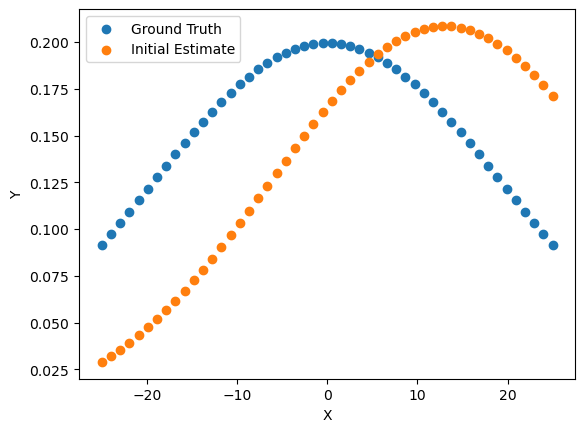

In [201]:
xobs = np.linspace(-25, 25, 50)
yobs = []
yest = []

plt.clf()

yobs = make_gaussian(xobs, 10, 0, 20)
yest = make_gaussian(xobs, 10, 13, 19.12)

plt.scatter(xobs, yobs)
plt.scatter(xobs, yest)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(['Ground Truth', 'Initial Estimate'])
plt.show()

## Defining the partial derivatives

In [109]:
def a_der(x, a, mean, std):
    y = make_gaussian(x, a, mean, std)/a
    return y

def m_der(x, a, mean, std):
    y = make_gaussian(x, a, mean, std) * ((x-mean)/(std**2))
    return y

def s_der(x, a, mean, std):
    y = make_gaussian(x, a, mean, std) * (-1/std) + make_gaussian(x, a, mean, std) * ((x-mean)**2/(std**3))
    return y

def jacobian(x, a, m, s):
    return np.c_[a_der(x, a, m, s), m_der(x, a, m, s), s_der(x, a, m, s)]
    
def residual(x, y, a, m, s):
    return make_gaussian(x, a, m, s) - y

## Function for Gradient descent

In [202]:
def gradient_descent(xobs, yobs, a, m, s):
    
    weights = np.array([a, m, s], dtype=np.double)
    
    for _ in range(5000):
        J = jacobian(xobs, weights[0], weights[1], weights[2])
        R = residual(xobs, yobs, weights[0], weights[1], weights[2])
        weights = weights - 10 * np.dot(J.T, R)
        
    return weights[0], weights[1], weights[2]

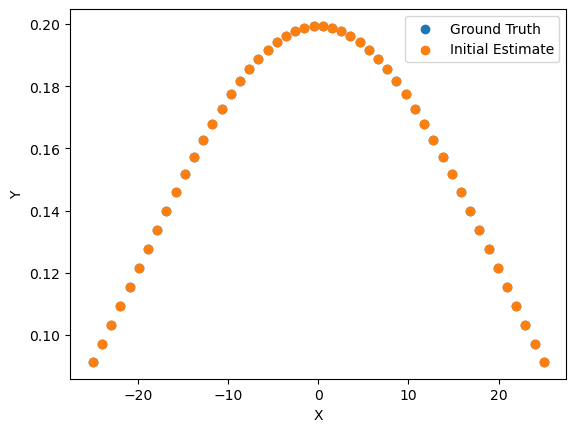

In [203]:
a, m, s = gradient_descent(xobs, yobs, 10, 13, 19.12)

plt.clf()

yobs = make_gaussian(xobs, 10, 0, 20)
yest = make_gaussian(xobs, a, m, s)

plt.scatter(xobs, yobs)
plt.scatter(xobs, yest)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(['Ground Truth', 'Initial Estimate'])
plt.show()

## 1.2: Another Non-Linear function
Now that you've got the hang of computing the jacobian matrix for a non-linear function via the aid of an example, try to compute the jacobian of a secondary gaussian function by carrying out steps similar to what has been shown above. The function is plotted below:
<img src='./helpers/non_linear.png' alt=drawing width=500 height=600>
Using the computed jacobian, optimise for the four parameters using gradient descent, where the parameters to be estimated are: 

$p_1$ = 2,  $p_2$ = 8,  $p_3$ = 4,  $p_4$ = 8. 

Do this for $x_{obs} = np.linspace(-20,30, num\_obs)$,
where $num\_obs$ is 50.



In [7]:
from helpers.func import make_non_linear

## 1.3: Different Optimizers

Replace gradient descent with Gauss-Newton and Levenberg Marquardt algorithms and repeat question 1.1. 

To quickly recap, Gauss-Newton and Levenberg Marquardt are alternate update rules to the standard gradient descent. Gauss Newton updates work as:

$$\delta x = -(J^TJ)^{-1}J^Tf(x)$$

Levenberg Marquardt lies somewhere between Gauss Newton and Gradient Descent algorithms by blending the two formulations. As a result, when at a steep cliff, LM takes small steps to avoid overshooting, and when at a gentle slope, LM takes bigger steps:


$$\delta x = -(J^TJ + \lambda I)^{-1}J^Tf(x)$$

**Questions**
1. How does the choice of initial estimate and learning rate affect convergence? Observations and analysis from repeated runs with modified hyperparameters will suffice.
2. Do you notice any difference between the three optimizers? Why do you think that is? (If you are unable to see a clear trend, what would you expect in general based on what you know about them)

In [204]:
def gauss_newton(xobs, yobs, a, m, s):
    
    weights = np.array([a, m, s], dtype=np.double)
    
    for _ in range(10):
        J = jacobian(xobs, weights[0], weights[1], weights[2])
        R = residual(xobs, yobs, weights[0], weights[1], weights[2])
        weights = weights - np.linalg.pinv(J.T @ J) @ J.T @ R
        
    return weights[0], weights[1], weights[2]

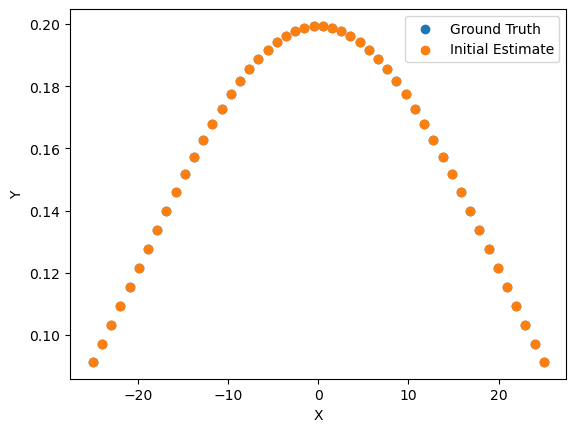

In [205]:
a, m, s = gauss_newton(xobs, yobs, 10, 13, 19.12)

plt.clf()

yobs = make_gaussian(xobs, 10, 0, 20)
yest = make_gaussian(xobs, a, m, s)

plt.scatter(xobs, yobs)
plt.scatter(xobs, yest)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(['Ground Truth', 'Initial Estimate'])
plt.show()

In [206]:
def levenberg_marquardt(xobs, yobs, a, m, s):
    
    weights = np.array([a, m, s], dtype=np.double)
    lmda = 1
    errors = [np.linalg.norm(residual(xobs, yobs, weights[0], weights[1], weights[2])) ** 2, ]
    
    for _ in range(10):
        J = jacobian(xobs, weights[0], weights[1], weights[2])
        R = residual(xobs, yobs, weights[0], weights[1], weights[2])
        new_error = np.linalg.norm(R) ** 2
        weights = weights - np.linalg.pinv((J.T @ J) + (lmda * np.eye(J.shape[1]))) @ J.T @ R
        
        if len(errors) > 0:
            if new_error > errors[-1]:
                lmda = lmda * 2
            else:
                lmda = lmda / 3
        errors.append(new_error)
        
    return weights[0], weights[1], weights[2]

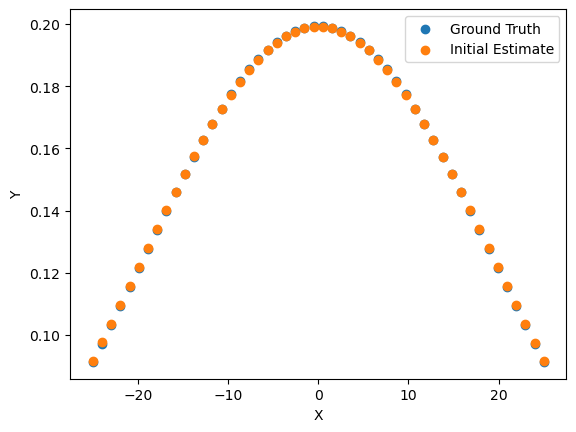

In [207]:
a, m, s = levenberg_marquardt(xobs, yobs, 10, 13, 19.12)

plt.clf()

yobs = make_gaussian(xobs, 10, 0, 20)
yest = make_gaussian(xobs, a, m, s)
plt.scatter(xobs, yobs)
plt.scatter(xobs, yest)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(['Ground Truth', 'Initial Estimate'])
plt.show()

# 2. Iterative Closest Point

In this subsection, we will code the Iterative Closest Point algorithm to find the alignment between two point clouds without known correspondences. The point cloud that you will be using is the same as the one that you used in Assignment 1.

## 2.1: Procrustes alignment

1. Write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them.
2. Use the bunny point cloud and perform the procrustes alignment between the two bunnies. Compute the absolute alignment error after aligning the two bunnies.
3. Make sure your code is modular as we will use this function in the next sub-part.
4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.


In [218]:
import numpy as np 
import math
import open3d as o3d

pcd = o3d.io.read_point_cloud("./bunny.pcd")
X = np.asarray(pcd.points)  
X = X.T

# Tuning the PCD a bit away form the origin 
X[0] = X[0] + 0.5
X[1] = X[1] + 0.5
X[2] = X[2] + 0.5

# Downsampling 25 times
X = X[:,::25]

# Getting the second point cloud and shuffling all the points
P = X

# Translating the second point cloud
P[0,:] = P[0,:] + .25
P[1,:] = P[1,:] + .25
P[2,:] = P[2,:] + .25

# Rotating the second point cloud
theta1 = ( 90.0 / 360) * 2 * np.pi
rot1 = np.array([[math.cos(theta1), -math.sin(theta1),0],
                 [math.sin(theta1),  math.cos(theta1),0],
               [0,0,1]])
P1 = np.dot(rot1, P)

# Visualzing the bunnies
pcd = o3d.geometry.PointCloud()
pcd1 = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(X.T)
pcd.paint_uniform_color([1, 0, 0])
pcd1.points = o3d.utility.Vector3dVector(P1.T)
pcd1.paint_uniform_color([0, 0, 1])
o3d.visualization.draw_geometries([pcd,pcd1],)

In [219]:
def Procrustes(X, P):
    
    num_iter = 3
    P0 = P  
    n = X.shape[1]
    dim = X.shape[0]
    T = np.identity(4)
    
    error = np.sqrt(np.sum(np.square(X-P)) / X.shape[1])
    print('Initial error: '+str(error))
    
    for i in range(num_iter):
        
        mean_pc1 = np.mean(X, axis = 1, keepdims = True)
        mean_pc2 = np.mean(P, axis = 1, keepdims = True)

        W = np.zeros((3,3))

        for ind in range(n):
            pc1 = X[:, ind]
            pc1 = pc1.reshape(3,1)
            arr1 = pc1 - mean_pc1
            pc2 = P[:, ind]
            pc2 = pc2.reshape(3,1)
            arr2 = pc2 - mean_pc2
            W = W+np.dot(arr1,arr2.T)

        W = W/n
        U, S, Vt = np.linalg.svd(W)
        
        # Rotation matrix
        R = np.dot(U,Vt)

        if np.linalg.det(R) < 0:
            print("lol")
            Vt[dim - 1, :]*=-1
            R = U @ Vt
        
        # Translation matrix
        t = mean_pc1 - np.dot( R , mean_pc2)
        
        T_itr = R
        T_itr = np.append(T_itr, t, axis=1)
        T_itr = np.vstack([T_itr, [0, 0, 0, 1]])
        T = np.dot(T_itr, T)
        P = np.dot(R, P) + t
        
        error = np.sqrt(np.sum(np.square(X-P)) / X.shape[1])
        print('Error after iteration '+str(i+1)+ ': '+str(error))

    return T

In [220]:
# ggez = P1
T = Procrustes(X,P1)

otot = np.ones(P1.shape[1])
P1 = np.vstack([P1, otot])
P1 = np.dot(T, P1)
P1 = P1[:3]

Initial error: 1.48421605809171
Error after iteration 1: 1.2801908852222935e-16
Error after iteration 2: 1.63166693365155e-16
Error after iteration 3: 1.9211788616152298e-16


In [221]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(X.T)
pcd.paint_uniform_color([1, 0, 0])
pcd1.points = o3d.utility.Vector3dVector(P1.T)
pcd1.paint_uniform_color([0, 0, 1])
o3d.visualization.draw_geometries([pcd,pcd1],)

## 2.2: ICP alignment

1. Write a function that takes two point clouds as input without known correspondences and perform the iterative closest point algorithm.
2. Perform the ICP alignment between the two bunnies and plot their individual coordinate frames as done in class.
3. Does ICP always give the correct alignment? Why or Why not?
4. What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?

In [54]:
import numpy as np 
import math
import open3d as o3d

pcd = o3d.io.read_point_cloud("./bunny.pcd")
X = np.asarray(pcd.points)  
X = X.T

# Tuning the PCD a bit away form the origin 
X[0] = X[0] + 0.5
X[1] = X[1] + 0.5
X[2] = X[2] + 0.5

# Downsampling 25 times
X = X[:,::25]

# Getting the second point cloud and shuffling all the points
P = X
P = P.T
np.random.shuffle(P)
P = P.T

# Translating the second point cloud
P[0,:] = P[0,:] + .25
P[1,:] = P[1,:] + .25
P[2,:] = P[2,:] + .25

# Rotating the second point cloud
theta1 = ( 90.0 / 360) * 2 * np.pi
rot1 = np.array([[math.cos(theta1), -math.sin(theta1),0],
                 [math.sin(theta1),  math.cos(theta1),0],
               [0,0,1]])
P1 = np.dot(rot1, P)

# Visualzing the bunnies
pcd = o3d.geometry.PointCloud()
pcd1 = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(X.T)
pcd.paint_uniform_color([1, 0, 0])
pcd1.points = o3d.utility.Vector3dVector(P1.T)
pcd1.paint_uniform_color([0, 0, 1])
o3d.visualization.draw_geometries([pcd,pcd1],)

In [58]:
# # This is a brute force implementation for nearest neightbour
# def nearest_neighbour(X,P):
#     corres = []
#     n = P.shape[1]    
#     for ind in range(n):
#         pc1 = P[:, ind]
#         pc1 = pc1.reshape(3,1) 
#         dist = 9999999999999 
#         idx = -1
#         for i in range(n):           
#             pc2 = X[:, i]
#             pc2 = pc2.reshape(3,1)
#             if np.sum(np.square(pc1-pc2)) < dist:
#                 dist = np.sum(np.square(pc1-pc2))
#                 idx = i
#         corres.append(idx)
#     return corres
           
# This is a KD trees implementation for nearest neighbour
from sklearn.neighbors import KDTree
tree = KDTree(X.T, leaf_size=2)   

def nearest_neighbour(P):
    corres = []
    n = P.shape[1]    
    for ind in range(n):
        dist, ind = tree.query([P.T[ind,:]], k=1)
        corres.append(ind[0])
    return corres

In [92]:
def ICP(X, P):
    itert = 0
    run  = True
    last_error = np.float64(10000000000.000)
    num_iter = 1000
    P0 = P  
    n = X.shape[1]
    dim = X.shape[0]
    
    while(run):
        itert+=1
        
        error = np.sqrt(np.sum(np.square(X-P)) / X.shape[1])
        print('Iteration No.: '+str(itert), '   Current error: '+str(error.round(5)), '   Last error: '+str(last_error.round(5)))
        last_error = error
        
        if(itert == num_iter):
            run = False
            print("iterations over naturally")

        if(error < 0.00001 and abs(last_error - error) < 0.00000001):
            run = False
            print("iterations over")
            
        mean_pc1 = np.mean(X, axis = 1, keepdims = True)
        mean_pc2 = np.mean(P, axis = 1, keepdims = True)

        W = np.zeros((3,3))
        cor = nearest_neighbour(P)
        cor = np.array(cor)
        cor  = cor.astype(int)
        for ind in range(n):
            pc1 = X[:, cor[ind]]
            pc1 = pc1.reshape(3,1)
            arr1 = pc1 - mean_pc1
            pc2 = P[:, ind]
            pc2 = pc2.reshape(3,1)
            arr2 = pc2 - mean_pc2
            W = W+np.dot(arr1,arr2.T)

        W = W/n
        U, S, Vt = np.linalg.svd(W)
        
        # Rotation matrix
        R = np.dot(U,Vt)
        if np.linalg.det(R) < 0:
            Vt[dim - 1, :]*=-1
            R = U @ Vt
            
        # Translation matrix
        t = mean_pc1 - np.dot( R , mean_pc2)
        
        P = np.dot(R, P) + t #Uncomment this: transforming my current point cloud towards initial point cloud

    return cor , P

In [93]:
a, b = ICP(X,P1)

Iteration No.: 1    Current error: 1.48422    Last error: 10000000000.0
Iteration No.: 2    Current error: 0.08449    Last error: 1.48422
Iteration No.: 3    Current error: 0.08209    Last error: 0.08449
Iteration No.: 4    Current error: 0.07989    Last error: 0.08209
Iteration No.: 5    Current error: 0.07807    Last error: 0.07989
Iteration No.: 6    Current error: 0.0766    Last error: 0.07807
Iteration No.: 7    Current error: 0.07523    Last error: 0.0766
Iteration No.: 8    Current error: 0.07415    Last error: 0.07523
Iteration No.: 9    Current error: 0.07318    Last error: 0.07415
Iteration No.: 10    Current error: 0.07237    Last error: 0.07318
Iteration No.: 11    Current error: 0.07158    Last error: 0.07237
Iteration No.: 12    Current error: 0.07086    Last error: 0.07158
Iteration No.: 13    Current error: 0.07013    Last error: 0.07086
Iteration No.: 14    Current error: 0.06945    Last error: 0.07013
Iteration No.: 15    Current error: 0.0687    Last error: 0.06945
I

In [94]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(X.T)
pcd.paint_uniform_color([1, 0, 0])
pcd1.points = o3d.utility.Vector3dVector(b.T)
pcd1.paint_uniform_color([0, 0, 1])
o3d.visualization.draw_geometries([pcd,pcd1],)